# Notes
- Last updated 3/29 11pm

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Get counties
top_county_file = "Zillow CSV results/top_counties_ppsf.csv"
top_county_df = pd.read_csv(top_county_file, encoding="latin")
bottom_county_file = "Zillow CSV results/bottom_counties_ppsf.csv"
bottom_county_df = pd.read_csv(bottom_county_file, encoding="latin")

In [3]:
# Clean up counties (Top)

top_county_df['RegionName'] = top_county_df['RegionName'].str.replace(" County", "")
top_county_df['County'] = top_county_df['RegionName'] + ", " + top_county_df['State']

top_county_clean = top_county_df[['County']]
top_county_clean = top_county_clean.iloc[::-1].reset_index(drop=True)


In [4]:
# Clean up counties (Bottom)
bottom_county_df['RegionName'] = bottom_county_df['RegionName'].str.replace(" County", "")
bottom_county_df['County'] = bottom_county_df['RegionName'] + ", " + bottom_county_df['State']

bottom_county_clean = bottom_county_df[['County']]


In [5]:
# Get health factor data and clean up
health_factor_path = "raw data/2018_all_county_data_1.csv"
health_factor_df = pd.read_csv(health_factor_path, encoding="latin")

health_factor_df["State"] = health_factor_df["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df['County'] = health_factor_df["County"] + ", " + health_factor_df["State"]

# PCP Rate
primary care physician per 100,000 population

In [6]:
# Get specific health factor data

PCP_rate = health_factor_df[["County", "PCP Rate"]]
PCP_rate.head()

,County,PCP Rate
0,"Autauga, AL",45.0
1,"Baldwin, AL",73.0
2,"Barbour, AL",42.0
3,"Bibb, AL",53.0
4,"Blount, AL",21.0


In [7]:
# Make merge for plotting
top_PCP = pd.merge(top_county_clean, PCP_rate, on='County', how='left')
bottom_PCP = pd.merge(bottom_county_clean, PCP_rate, on='County', how='left')
all_PCP = pd.merge(bottom_PCP, top_PCP, on=['County','PCP Rate'],how='outer')
all_PCP

,County,PCP Rate
0,"Monroe, AL",32.0
1,"Haskell, TX",52.0
2,"Mitchell, TX",22.0
3,"Wyoming, WV",27.0
4,"Jackson, AR",52.0
5,"Morris, TX",16.0
6,"Falls, TX",12.0
7,"Labette, KS",72.0
8,"Hutchinson, TX",37.0
9,"Randolph, IN",20.0


<BarContainer object of 20 artists>

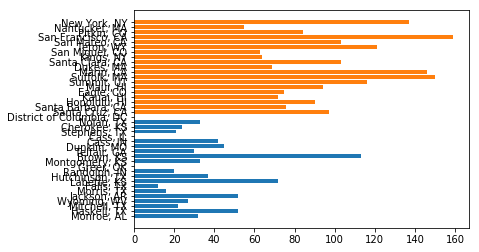

In [8]:
# Plot
plt.barh(bottom_PCP['County'], bottom_PCP['PCP Rate'])
plt.barh(top_PCP['County'], top_PCP['PCP Rate'])

# Dentist Rate
dentist per 100,000 population

In [9]:
# Get specific health factor data

dentist_rate_df = health_factor_df[["County", "Dentist Rate"]]
dentist_rate_df.head()

,County,Dentist Rate
0,"Autauga, AL",32.0
1,"Baldwin, AL",49.0
2,"Barbour, AL",35.0
3,"Bibb, AL",22.0
4,"Blount, AL",19.0


In [10]:
# Make merge for plotting
top_dentist = pd.merge(top_county_clean, dentist_rate_df, on='County', how='left')
bottom_dentist = pd.merge(bottom_county_clean, dentist_rate_df, on='County', how='left')
all_dentist = pd.merge(bottom_dentist, top_dentist, on=['County','Dentist Rate'],how='outer')
all_dentist

,County,Dentist Rate
0,"Monroe, AL",23.0
1,"Haskell, TX",35.0
2,"Mitchell, TX",11.0
3,"Wyoming, WV",18.0
4,"Jackson, AR",35.0
5,"Morris, TX",40.0
6,"Falls, TX",23.0
7,"Labette, KS",29.0
8,"Hutchinson, TX",37.0
9,"Randolph, IN",28.0


<BarContainer object of 20 artists>

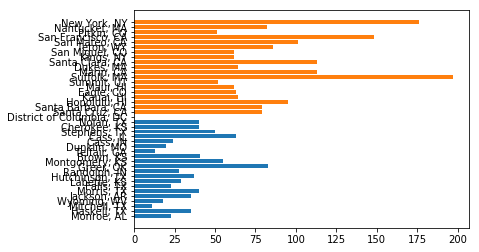

In [11]:
# Plot

plt.barh(bottom_dentist['County'], bottom_dentist['Dentist Rate'])

plt.barh(top_dentist['County'], top_dentist['Dentist Rate'])

# MHP Rate
mental health provider per 100,000 population

In [12]:
# Get specific health factor data

MHP_rate = health_factor_df[["County", "MHP Rate"]]
MHP_rate.head()

,County,MHP Rate
0,"Autauga, AL",13.0
1,"Baldwin, AL",89.0
2,"Barbour, AL",8.0
3,"Bibb, AL",9.0
4,"Blount, AL",9.0


In [13]:
# Make merge for plotting
top_MHP = pd.merge(top_county_clean, MHP_rate, on='County', how='left')
bottom_MHP = pd.merge(bottom_county_clean, MHP_rate, on='County', how='left')
all_MHP = pd.merge(bottom_MHP, top_MHP, on=['County','MHP Rate'],how='outer')
all_MHP

,County,MHP Rate
0,"Monroe, AL",70.0
1,"Haskell, TX",53.0
2,"Mitchell, TX",NaN
3,"Wyoming, WV",23.0
4,"Jackson, AR",105.0
5,"Morris, TX",24.0
6,"Falls, TX",12.0
7,"Labette, KS",73.0
8,"Hutchinson, TX",14.0
9,"Randolph, IN",28.0


<BarContainer object of 20 artists>

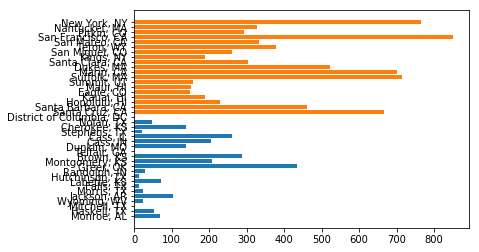

In [14]:
# Plot

plt.barh(bottom_MHP['County'], bottom_MHP['MHP Rate'])

plt.barh(top_MHP['County'], top_MHP['MHP Rate'])

# Multiplot

<BarContainer object of 40 artists>

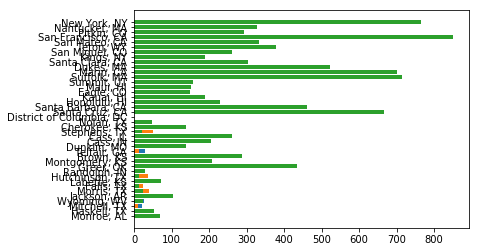

In [15]:

plt.barh(all_PCP['County'], all_PCP['PCP Rate'])
plt.barh(all_dentist['County'], all_dentist['Dentist Rate'])
plt.barh(all_MHP['County'], all_MHP['MHP Rate'])


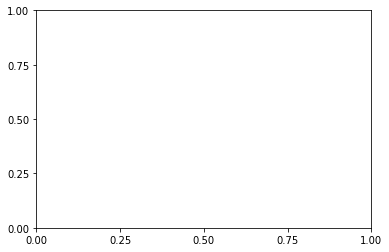

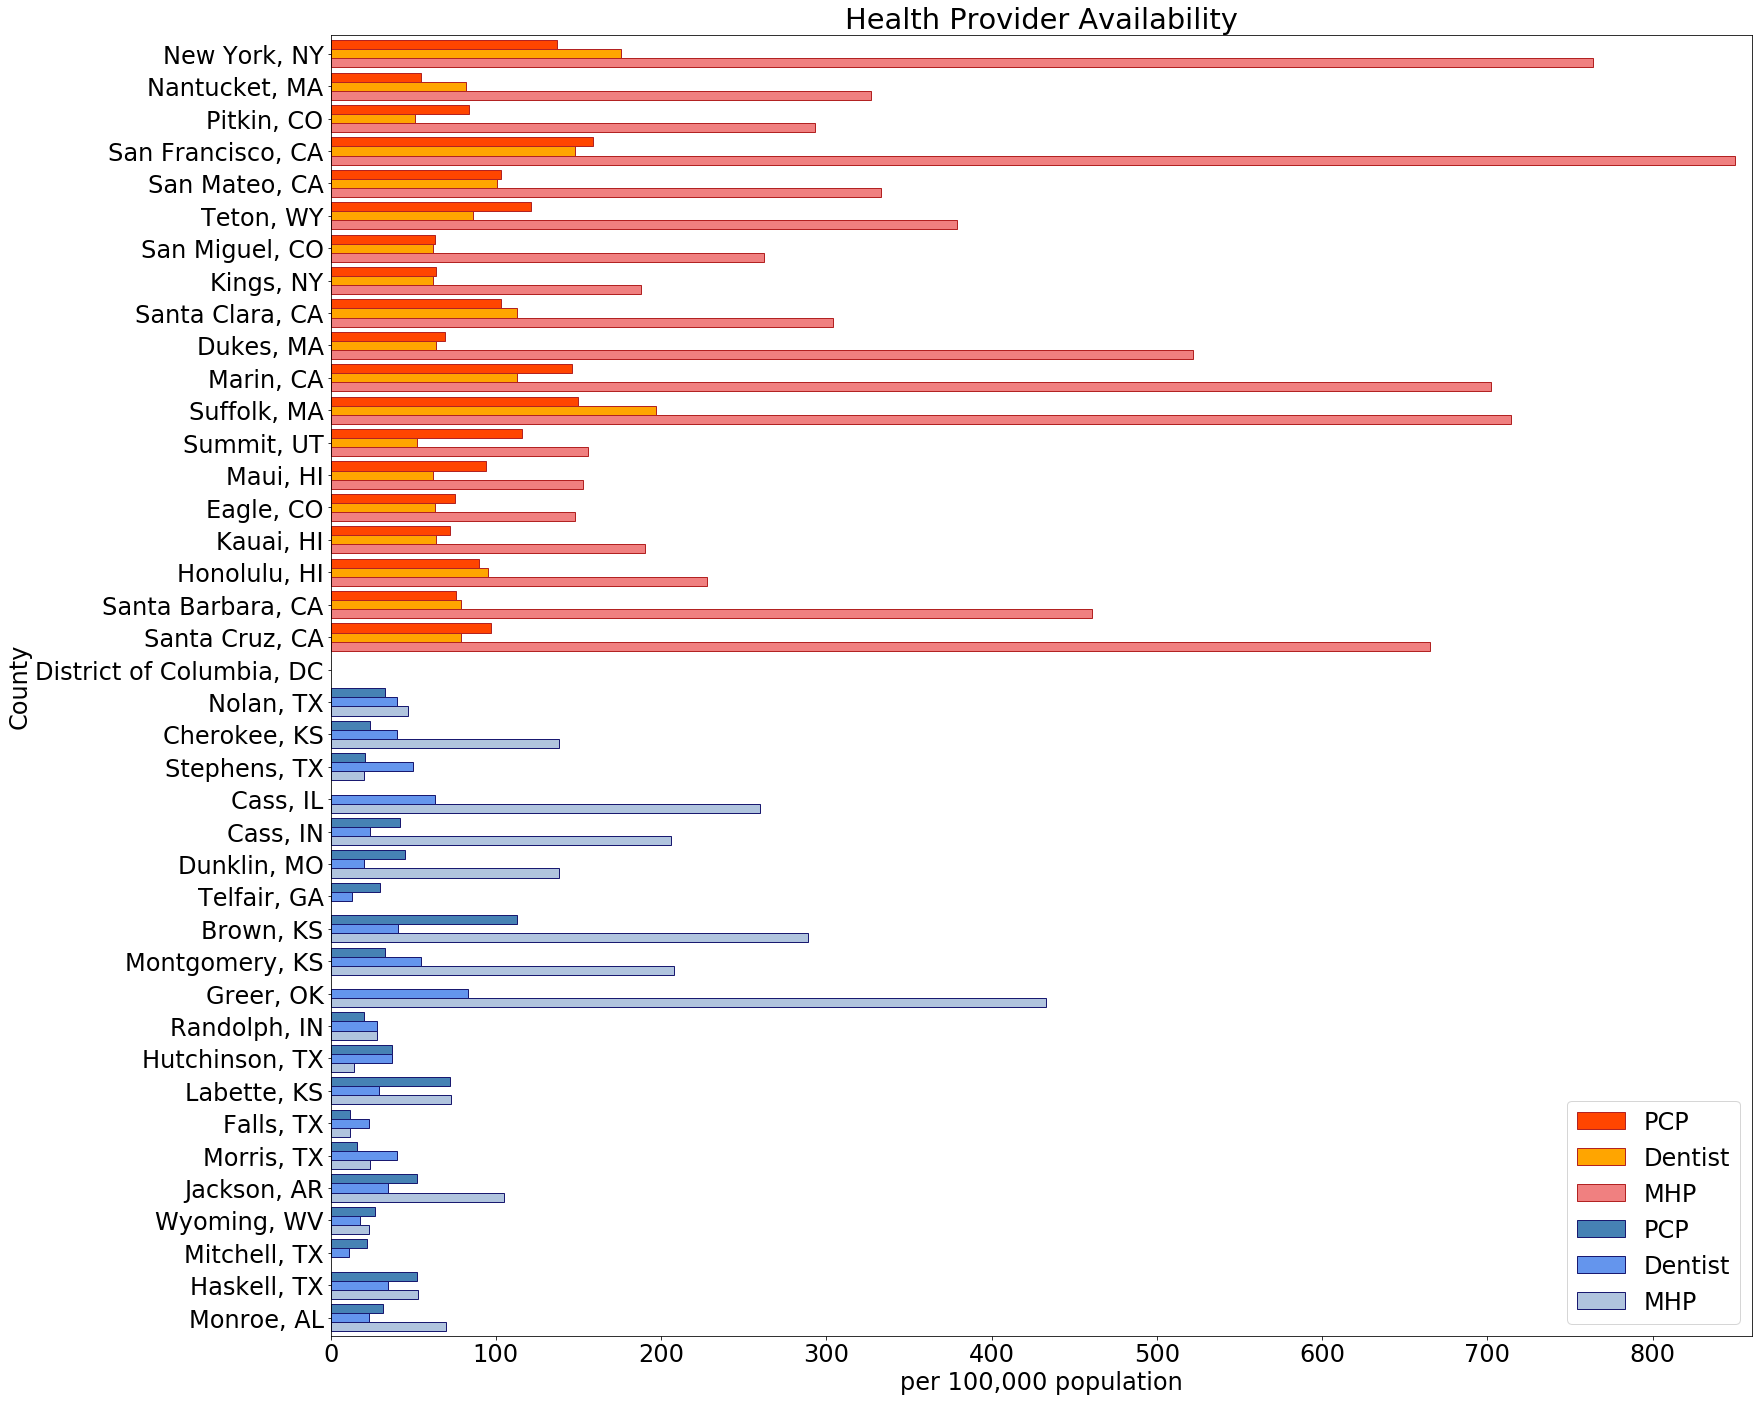

In [16]:

# data to plot
n_groups = 40
PCP_plot = (all_PCP['PCP Rate'])
dentist_plot = (all_dentist['Dentist Rate'])
MHP_plot = (all_MHP['MHP Rate'])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.28
 
plt.figure(figsize=(25,20))  
plt.rcParams.update({'font.size': 24})

mhp_plot = plt.barh(index, MHP_plot, bar_width,
                  alpha=1,
                  color=['lightsteelblue' for _ in range(20)]+['lightcoral' for _ in range(20)],
                  edgecolor=['midnightblue' for _ in range(20)]+['firebrick' for _ in range(20)],
                  label='MHP')

dentist_plot = plt.barh(index + bar_width, dentist_plot, bar_width,
                  alpha=1,
                  color=['cornflowerblue' for _ in range(20)]+['orange' for _ in range(20)],
                  edgecolor=['midnightblue' for _ in range(20)]+['firebrick' for _ in range(20)],
                  label='Dentist')

pcp_plot = plt.barh(index + 2*bar_width, PCP_plot, bar_width,
                  alpha=1,
                  color=['steelblue' for _ in range(20)]+['orangered' for _ in range(20)],
                  edgecolor=['midnightblue' for _ in range(20)]+['firebrick' for _ in range(20)],
                  label='PCP')


plt.ylabel('County')
plt.xlabel('per 100,000 population')
plt.title('Health Provider Availability')
plt.yticks(index + bar_width, (all_PCP['County']))

plt.legend((pcp_plot[20], dentist_plot[20], mhp_plot[20], pcp_plot, dentist_plot, mhp_plot), ("PCP", "Dentist", "MHP", "PCP", "Dentist", "MHP"), loc='lower right')

plt.ylim(-0.28,39.87) 
plt.xlim(0,860)
      
plt.tight_layout()
# plt.show()
plt.savefig("Plots/available_services_by_price_per_sq_ft.png")